In [1]:
import tensorflow as tf
from keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [3]:
X_train.shape,y_train.shape # X_train has 50k images with a size of 32*32*3 each

((50000, 32, 32, 3), (50000, 1))

In [4]:
X_train[0] # Displaying the 1st image (pixel value ranges between 0-255)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [5]:
X_test.shape
# We will be unable to convert in into a dataframe as it takes 2d data

(10000, 32, 32, 3)

In [6]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [7]:
y_train[:5].shape

(5, 1)

In [8]:
# Converting the labels from 2d to 1d
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [9]:
y_test=y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [10]:
# The classes are:
# Label===>Description
# 0===>airplane
# 1===>automobile
# 2===>bird
# 3===>cat
# 4===>deer
# 5===>dog
# 6===>frog
# 7===>horse
# 8===>ship
# 9===>truck

In [11]:
classes=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

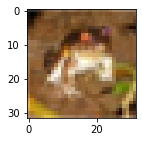

In [12]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])
# displaying the some image  from our dataset

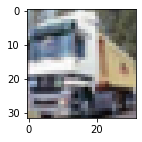

In [13]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[1])

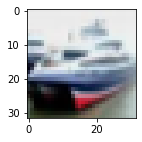

In [14]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[1])

In [15]:
def Show_Image(x,index,y,classes):
    plt.figure(figsize = (15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])
    plt.show()

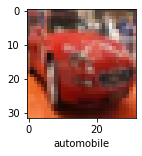

In [16]:
Show_Image(X_train,5,y_train,classes)

In [17]:
# Normalizing the images so that the computation cost decresases while processing the images with the help of our CNN model
X_train=X_train/255.

In [18]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [19]:
X_test=X_test/255.

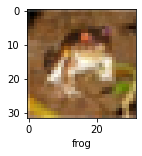

In [20]:
# Lets see how the image looks after normalization
Show_Image(X_train,0,y_train,classes) # There is no change in the image even after normalization

In [23]:
# Let's first create an initial cnn model with 3 convolution layers and 3 max pooling and then based on the accuracy we will decide
# wheather to fine tune the model or not

In [24]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # kernal_size is the size of the filter
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=50, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [25]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [26]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5549 - accuracy: 0.4314
Epoch 2/10
1563/1563 [==============================] - 46s 29ms/step - loss: 1.2054 - accuracy: 0.5724
Epoch 3/10
1563/1563 [==============================] - 48s 31ms/step - loss: 1.0733 - accuracy: 0.6251
Epoch 4/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9828 - accuracy: 0.6579
Epoch 5/10
1563/1563 [==============================] - 46s 30ms/step - loss: 0.9254 - accuracy: 0.6765
Epoch 6/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.8658 - accuracy: 0.6973
Epoch 7/10
1563/1563 [==============================] - 51s 33ms/step - loss: 0.8230 - accuracy: 0.7118
Epoch 8/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7880 - accuracy: 0.7258
Epoch 9/10
1563/1563 [==============================] - 49s 31ms/step - loss: 0.7502 - accuracy: 0.7394
Epoch 10/10
1563/1563 [==============================] - 47s 30m

In [27]:
# We are getting an accuracy of 74% on the train data using the cnn with the above configuration

In [28]:
cnn.evaluate(X_test,y_test)# 69% accuracy on the test set

313/313 [==============================] - 3s 10ms/step - loss: 0.8851 - accuracy: 0.6992


[0.8850563764572144, 0.6991999745368958]

In [29]:
y_pred=cnn.predict(X_test)

In [30]:
y_pred[0]

array([0.00450892, 0.00114073, 0.01192842, 0.7274016 , 0.00793705,
       0.14859442, 0.0463654 , 0.0009557 , 0.04885104, 0.00231687],
      dtype=float32)

In [31]:
# As we have used softmax activation function in the output layer it will give the probability of the test image to be in each
# classes and by doing argmax we can get the index of the class having the highest probability

In [32]:
y_pred[:5]

array([[4.50891722e-03, 1.14072510e-03, 1.19284177e-02, 7.27401614e-01,
        7.93704949e-03, 1.48594424e-01, 4.63654026e-02, 9.55696800e-04,
        4.88510355e-02, 2.31687049e-03],
       [1.68213889e-01, 3.99281323e-01, 5.06954530e-06, 8.79501476e-06,
        1.87927367e-06, 8.20308651e-06, 2.51815618e-06, 1.19195579e-06,
        4.15609002e-01, 1.68680865e-02],
       [4.82703298e-02, 1.62968323e-01, 8.83406308e-03, 3.90187800e-02,
        2.64683436e-03, 8.62881728e-03, 3.07676569e-03, 1.89712178e-03,
        6.76198423e-01, 4.84605171e-02],
       [8.45295131e-01, 4.43619899e-02, 1.23131415e-02, 1.58752501e-03,
        1.23987608e-02, 5.16138563e-04, 3.99701158e-03, 1.96910129e-04,
        7.73520470e-02, 1.98139204e-03],
       [8.38140913e-05, 3.74090559e-05, 4.86445874e-02, 3.20558017e-03,
        5.20422518e-01, 2.44848081e-03, 4.24894035e-01, 5.18542365e-05,
        2.06746365e-04, 4.82403721e-06]], dtype=float32)

In [33]:
pred_classes=[np.argmax(prob) for prob in y_pred]
pred_classes[:5]

[3, 8, 8, 0, 4]

In [34]:
# The 1st 5 images havae been classified successfully as the pred_class and y_test value are same

In [35]:
# lets check the preformance of the model wrt confusion matrix and classification report
from sklearn.metrics import classification_report,confusion_matrix

In [36]:
confusion_matrix(y_test,pred_classes)

array([[793,  20,  52,  12,  10,   8,   9,   3,  54,  39],
       [ 41, 801,   4,   6,   5,  11,   9,   1,  31,  91],
       [ 80,   4, 598,  46,  64, 106,  66,  11,  11,  14],
       [ 23,   6,  88, 496,  56, 218,  61,  15,  12,  25],
       [ 28,   2, 108,  64, 604,  79,  52,  44,  11,   8],
       [ 19,   2,  63, 134,  27, 689,  20,  22,   6,  18],
       [  6,   4,  57,  72,  22,  40, 776,   4,   6,  13],
       [ 26,   3,  39,  54,  78, 135,   7, 621,   4,  33],
       [ 98,  27,  21,  15,   6,   8,   6,   2, 779,  38],
       [ 31,  55,  14,  12,   2,   6,   9,   7,  29, 835]], dtype=int64)

In [37]:
import pandas as pd
pd.DataFrame(confusion_matrix(y_test,pred_classes),columns=[f"pred_{i}" for i in classes],index=[f"actual_{i}" for i in classes])

,pred_airplane,pred_automobile,pred_bird,pred_cat,pred_deer,pred_dog,pred_frog,pred_horse,pred_ship,pred_truck
actual_airplane,793,20,52,12,10,8,9,3,54,39
actual_automobile,41,801,4,6,5,11,9,1,31,91
actual_bird,80,4,598,46,64,106,66,11,11,14
actual_cat,23,6,88,496,56,218,61,15,12,25
actual_deer,28,2,108,64,604,79,52,44,11,8
actual_dog,19,2,63,134,27,689,20,22,6,18
actual_frog,6,4,57,72,22,40,776,4,6,13
actual_horse,26,3,39,54,78,135,7,621,4,33
actual_ship,98,27,21,15,6,8,6,2,779,38
actual_truck,31,55,14,12,2,6,9,7,29,835


In [38]:
print(classification_report(y_test,pred_classes))

              precision    recall  f1-score   support

           0       0.69      0.79      0.74      1000
           1       0.87      0.80      0.83      1000
           2       0.57      0.60      0.59      1000
           3       0.54      0.50      0.52      1000
           4       0.69      0.60      0.64      1000
           5       0.53      0.69      0.60      1000
           6       0.76      0.78      0.77      1000
           7       0.85      0.62      0.72      1000
           8       0.83      0.78      0.80      1000
           9       0.75      0.83      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.71      0.70      0.70     10000
weighted avg       0.71      0.70      0.70     10000



In [39]:
# Checking some of the misclassified images
def Get_Wrong_Pred_Index(y_test,pred_classes,start,end):
    index_list=[]
    for i,actual_class in enumerate(y_test[start:end]):
        for j,predicted_class in enumerate(pred_classes[start:end]):
            if i==j and actual_class!=predicted_class:
                index_list.append(i+start)
    return index_list

In [40]:
# getting the indices of the no of misclassified images from the 1st 10 predictions
Get_Wrong_Pred_Index(y_test,pred_classes,0,10)

[4]

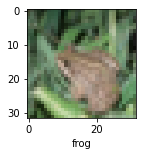

In [41]:
# So only the 5th image from the 1st 10 images is a misclassification lets check it
Show_Image(X_test,4,y_test,classes)

In [42]:
classes[pred_classes[4]] # the actual image was of frog and our model has predicted it as deer

'deer'

In [43]:
Get_Wrong_Pred_Index(y_test,pred_classes,10,20)

[12, 17]

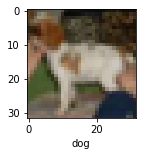

In [44]:
Show_Image(X_test,12,y_test,classes)

In [45]:
classes[pred_classes[12]]

'frog'

In [46]:
# As some of the misclassified images where really hazy and tough to classify even by humans.So I think the cnn model has
# done a decent job

In [53]:
# Tuning the model
def build_model(hp):
    model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(32,32,3)
    ),
    tf.keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=64, max_value=256, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    tf.keras.layers.Conv2D(
        filters=hp.Int('conv_3_filter', min_value=80, max_value=400, step=16),
        kernel_size=hp.Choice('conv_3_kernel', values = [3,5]),
        activation='relu'
    ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=256, step=16),
        activation='relu'
    ),
    tf.keras.layers.Dense(10, activation='softmax')
    ])
  
    model.compile(optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model

In [54]:
from kerastuner import RandomSearch

In [55]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='accuracy',project_name="ciphar10")

In [56]:
tuner_search.search(X_train,y_train,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 31m 07s]
val_accuracy: 0.09860000014305115

Best val_accuracy So Far: 0.63919997215271
Total elapsed time: 03h 36m 11s
INFO:tensorflow:Oracle triggered exit


In [57]:
model=tuner_search.get_best_models(num_models=1)[0]

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 80)        2240      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 64)        128064    
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 336)       193872    
_________________________________________________________________
flatten (Flatten)            (None, 193536)            0         
_________________________________________________________________
dense (Dense)                (None, 176)               34062512  
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1770      
Total params: 34,388,458
Trainable params: 34,388,458
Non-trainable params: 0
____________________________________________

In [60]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=80, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)), # kernal_size is the size of the filter
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=336, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(176, activation='relu'),
    layers.Dense(10, activation='softmax')
])
cnn_model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
cnn_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 94s 60ms/step - loss: 1.4879 - accuracy: 0.4552
Epoch 2/10
1563/1563 [==============================] - 96s 61ms/step - loss: 1.0783 - accuracy: 0.6203
Epoch 3/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.8929 - accuracy: 0.6878
Epoch 4/10
1563/1563 [==============================] - 95s 61ms/step - loss: 0.7808 - accuracy: 0.7253
Epoch 5/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.6853 - accuracy: 0.7594
Epoch 6/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.5993 - accuracy: 0.7921
Epoch 7/10
1563/1563 [==============================] - 96s 61ms/step - loss: 0.5328 - accuracy: 0.8134
Epoch 8/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.4677 - accuracy: 0.8361
Epoch 9/10
1563/1563 [==============================] - 96s 62ms/step - loss: 0.4067 - accuracy: 0.85700s - loss: 0.4068 - accuracy: 0.85 - ETA: 0s - loss: 0.406
Epoch 

In [62]:
cnn_model.evaluate(X_test,y_test) # 2% incresase in the accuracy

313/313 [==============================] - 3s 9ms/step - loss: 0.9686 - accuracy: 0.7191


[0.9685942530632019, 0.7190999984741211]

In [65]:
prediction=cnn_model.predict(X_test)

In [66]:
prediction[:5]

array([[7.74719927e-04, 8.93456687e-04, 1.02307030e-03, 6.68020785e-01,
        2.23487528e-04, 2.75770009e-01, 1.34468381e-03, 2.31147534e-03,
        4.96141948e-02, 2.41236521e-05],
       [1.63189878e-04, 9.11542593e-05, 1.13771135e-08, 7.29761984e-09,
        3.76168680e-11, 1.79704862e-11, 3.57917203e-11, 1.29633717e-11,
        9.99742687e-01, 3.02031162e-06],
       [3.18401493e-02, 6.79331785e-03, 6.46150624e-03, 5.95550006e-03,
        7.79628244e-05, 1.86881993e-03, 1.73838445e-04, 3.35958757e-04,
        9.24952626e-01, 2.15403568e-02],
       [4.04871225e-01, 2.65342612e-02, 3.23299199e-01, 1.40991405e-01,
        1.14971185e-02, 2.67943158e-03, 4.02671508e-02, 4.34880028e-04,
        4.34966013e-02, 5.92856249e-03],
       [1.43719063e-08, 2.16994721e-07, 6.95811724e-03, 1.68286427e-03,
        9.54245389e-01, 2.23089723e-04, 3.68898809e-02, 4.03395632e-07,
        3.84306142e-09, 9.87971038e-09]], dtype=float32)

In [68]:
predicted_class=[np.argmax(i) for i in prediction]
predicted_class[:5]

[3, 8, 8, 0, 4]

In [69]:
pd.DataFrame(confusion_matrix(y_test,predicted_class),columns=[f"pred_{i}" for i in classes],index=[f"actual_{i}" for i in classes])

,pred_airplane,pred_automobile,pred_bird,pred_cat,pred_deer,pred_dog,pred_frog,pred_horse,pred_ship,pred_truck
actual_airplane,781,15,69,36,15,4,8,13,40,19
actual_automobile,26,811,9,16,6,7,11,6,24,84
actual_bird,62,5,652,59,82,48,45,29,10,8
actual_cat,21,4,97,582,70,113,45,33,13,22
actual_deer,15,0,107,72,699,24,26,47,7,3
actual_dog,15,1,93,175,53,572,13,56,12,10
actual_frog,7,3,67,73,45,26,755,8,6,10
actual_horse,16,0,45,53,96,42,3,725,3,17
actual_ship,97,21,15,26,10,7,8,5,785,26
actual_truck,36,52,14,19,8,8,5,15,14,829


In [70]:
print(classification_report(y_test,predicted_class))

              precision    recall  f1-score   support

           0       0.73      0.78      0.75      1000
           1       0.89      0.81      0.85      1000
           2       0.56      0.65      0.60      1000
           3       0.52      0.58      0.55      1000
           4       0.64      0.70      0.67      1000
           5       0.67      0.57      0.62      1000
           6       0.82      0.76      0.79      1000
           7       0.77      0.72      0.75      1000
           8       0.86      0.79      0.82      1000
           9       0.81      0.83      0.82      1000

    accuracy                           0.72     10000
   macro avg       0.73      0.72      0.72     10000
weighted avg       0.73      0.72      0.72     10000



In [72]:
Get_Wrong_Pred_Index(y_test,predicted_class,0,10)

[4, 6, 7, 9]

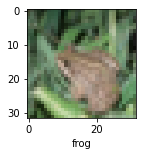

In [75]:
Show_Image(X_test,4,y_test,classes)

In [76]:
classes[predicted_class[4]]

'deer'

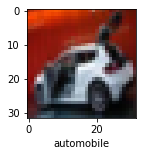

In [77]:
Show_Image(X_test,6,y_test,classes)

In [78]:
classes[predicted_class[6]]

'truck'

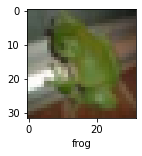

In [79]:
Show_Image(X_test,7,y_test,classes)

In [80]:
classes[predicted_class[7]]

'bird'

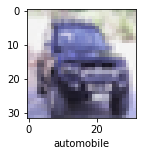

In [81]:
Show_Image(X_test,9,y_test,classes)

In [82]:
classes[predicted_class[9]]

'truck'

In [85]:
Get_Wrong_Pred_Index(y_test,predicted_class,20,30)

[21, 24]

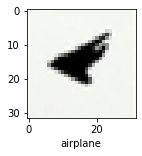

In [86]:
Show_Image(X_test,21,y_test,classes)

In [87]:
classes[predicted_class[21]]

'bird'

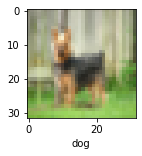

In [88]:
Show_Image(X_test,24,y_test,classes)

In [89]:
classes[predicted_class[24]]

'deer'

In [90]:
Get_Wrong_Pred_Index(y_test,predicted_class,30,40)

[35]

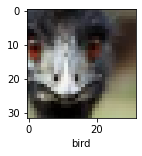

In [93]:
Show_Image(X_test,35,y_test,classes)

In [94]:
classes[predicted_class[35]]

'cat'

In [21]:
from keras.models import load_model

In [98]:
cnn_model.save('cnn.h5')